In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import *
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from keras.layers import Activation, Dense

In [56]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [57]:
df.columns = ["Age", "Gender", "TB", "DB", "Alk", "sgpt", "sgot", "TP", "ALB", "AG", "label"]

In [58]:
df.head()

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG,label
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [59]:
df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)

In [60]:
df.head()

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG,label
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [61]:
df.shape

(582, 11)

In [62]:
df.dropna(axis = 0, inplace = True)

<AxesSubplot:>

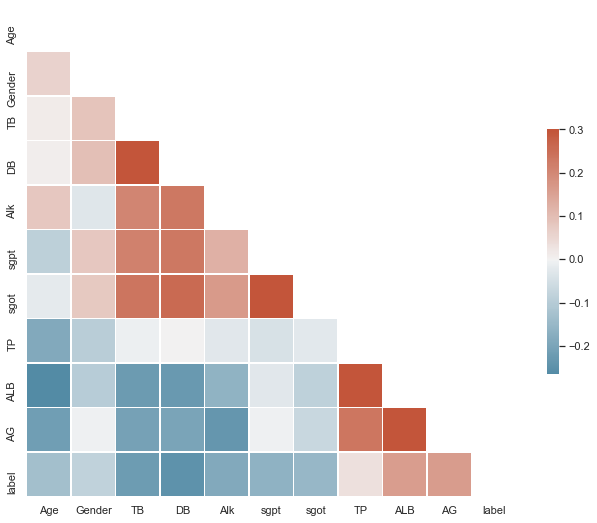

In [63]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


rs = np.random.RandomState(33)
d = pd.DataFrame(data=df,
                 columns=list(df.columns))


corr = d.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlation of attributes

In [64]:
### Age distribution

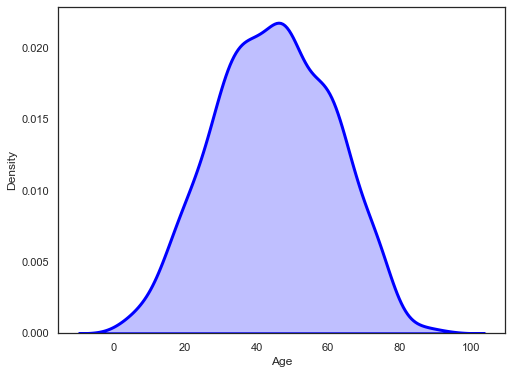

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['Age'], hist = False, kde = True, color="blue",
                 kde_kws = {'shade': True, 'linewidth': 3}, ax = ax);

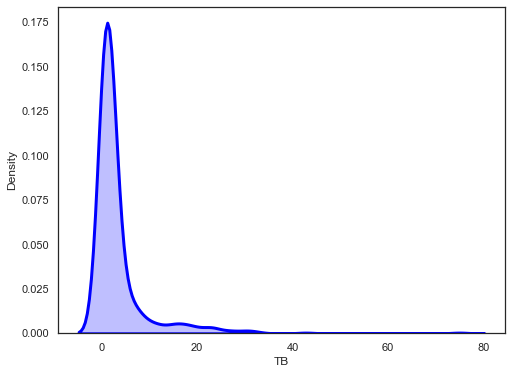

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['TB'], hist = False, kde = True, color="blue",
                 kde_kws = {'shade': True, 'linewidth': 3}, ax = ax);

### TB distribution 

In [67]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alk', 'sgpt', 'sgot', 'TP', 'ALB', 'AG',
       'label'],
      dtype='object')

In [68]:
### Boxplots - To study the distribution of TP, ALB, AG

<AxesSubplot:>

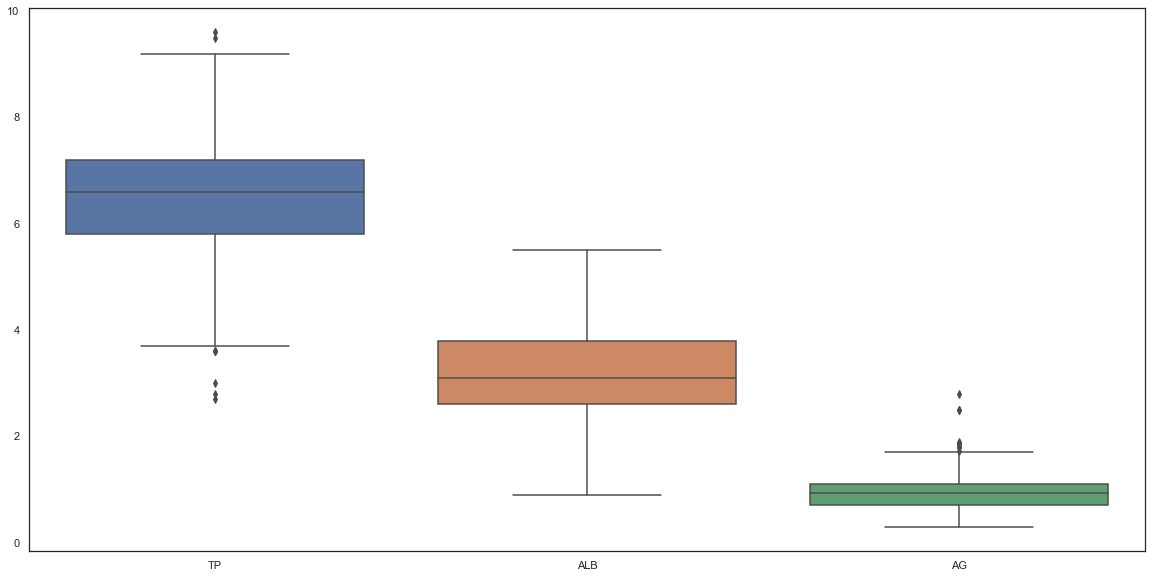

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = df[['TP', 'ALB', 'AG']], ax = ax)

### Boxplots to check interquartile ranges

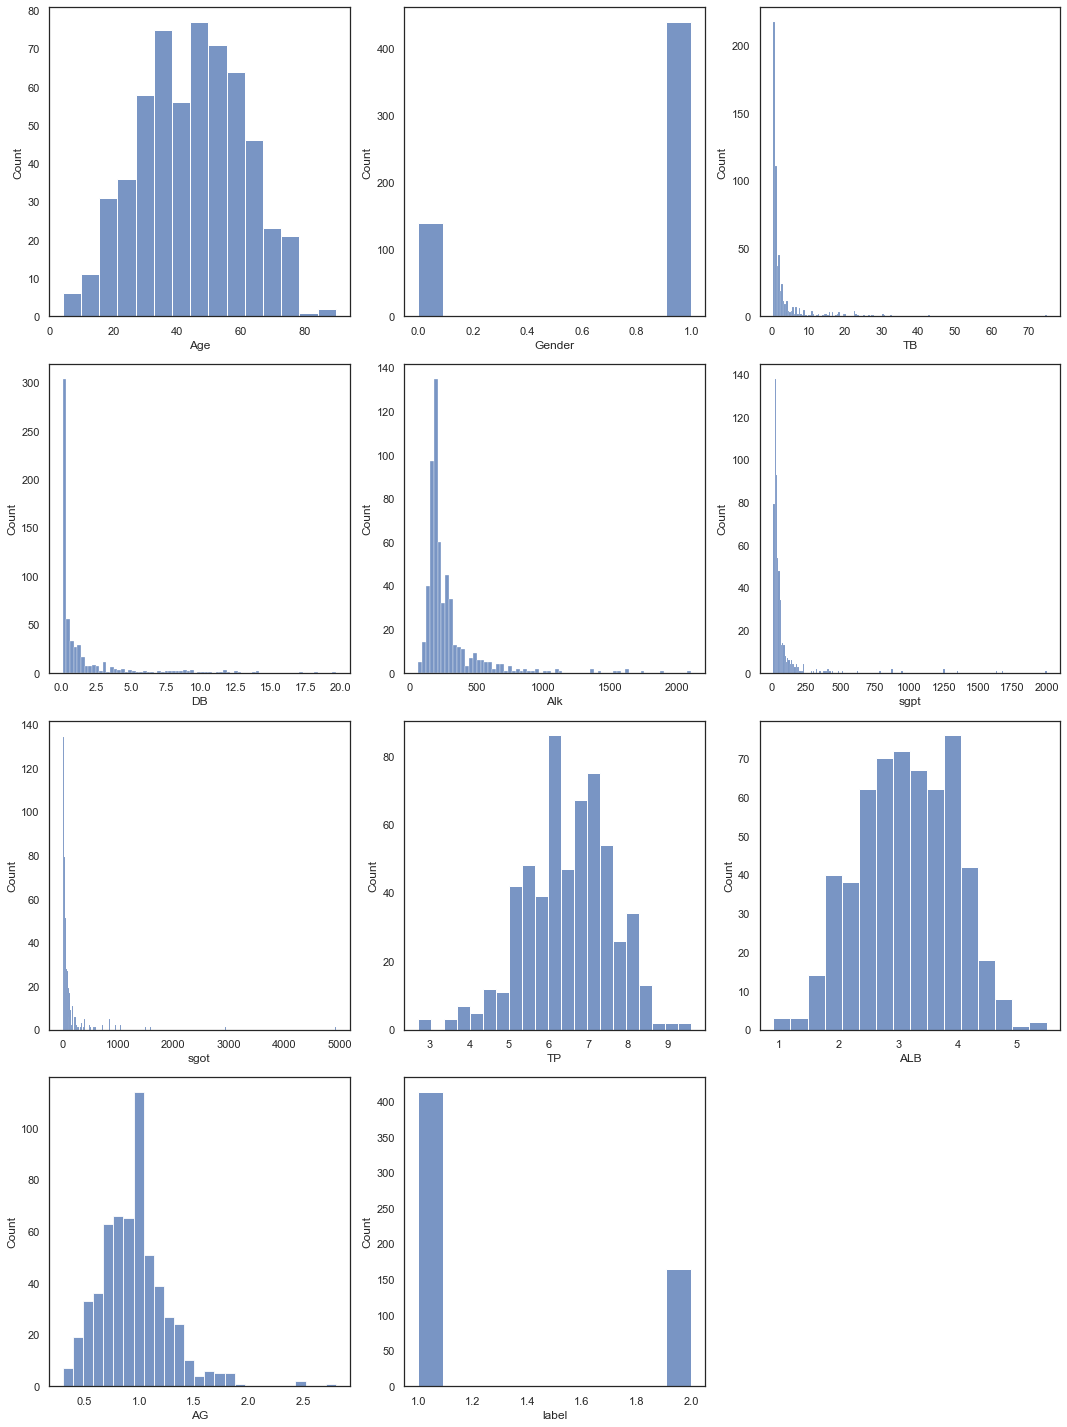

In [70]:
cols = 3
rows = 4
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax = fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### Bargraphs for each attribute

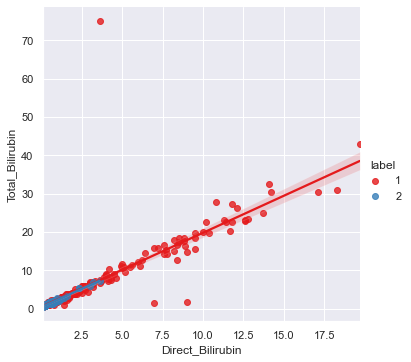

In [71]:
sns.set()

g = sns.lmplot(x="DB", y="TB", hue="label",
               height=5, data=df,  palette="Set1")

g.set_axis_labels("Direct_Bilirubin", "Total_Bilirubin");

### Relation between Total_Bilirubin and Direct_Bilirubin

In [72]:
df.shape

(578, 11)

In [73]:
X = df.iloc[:,:10]

In [74]:
X

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30
...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [75]:
y = df.iloc[:, 10]

In [76]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [77]:
y.value_counts()

1    413
2    165
Name: label, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [79]:
X_train.head()

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG
374,47,1,3.5,1.6,206,32,31,6.8,3.4,1.0
346,38,1,0.7,0.2,216,349,105,7.0,3.5,1.0
142,30,1,1.6,0.4,332,84,139,5.6,2.7,0.9
424,58,1,0.4,0.1,100,59,126,4.3,2.5,1.4
6,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1


In [80]:
y_train.head()

374    1
346    1
142    1
424    1
6      1
Name: label, dtype: int64

In [81]:
X_train.shape, y_train.shape

((404, 10), (404,))

In [82]:
clf = svm.SVC(kernel='linear')

In [83]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [84]:
y_pred = clf.predict(X_test)

In [85]:
print("SVM - Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM - Accuracy: 0.7126436781609196


## SVM - Crow Search

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=11)

In [87]:
classifier = svm.SVC(kernel='rbf')

In [88]:
classifier.fit(X_train, y_train , optimizer = 'csa')

SVC()

In [89]:
classifier.fit(X_train, y_train)

SVC()

In [90]:
y_pred = classifier.predict(X_test)

In [263]:
print("SVM w/ Crow Search - Accuracy:", metrics.accuracy_score(y_test, y_pred))

SVM w/ Crow Search - Accuracy: 0.8986206896551724


## Sequential

In [91]:
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

tol = 0.01
eps = 0.01

In [92]:
class SMOModel:
    def __init__(self,X,Y,C,b,kernel):
        self.m = Y.shape[0]
        self.y = Y
        self.X = X
        self.C = C
        self.b = b
        self.kernel = kernel
        self.alphas = np.zeros(self.m)
        self.errors = decision_function(self.alphas, self.y, self.kernel,self.X, self.X, self.b) - self.y

In [93]:
def gaussian_kernel(x, y, sigma=1):
    if np.ndim(x) == 1 and np.ndim(y) == 1:
        result = np.exp(- (np.linalg.norm(x - y, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):
        result = np.exp(- (np.linalg.norm(x - y, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:
        result = np.exp(- (np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result

def linear_kernel(X1,X2):
    return np.inner(X1,X2)

def objective_function(alphas, y, kernel, X):
    return np.sum(alphas) - 0.5 * np.sum((y[:, None] * y[None, :]) * kernel(X, X) * (alphas[:, None] * alphas[None, :]))

def decision_function(alphas, y, kernel, X_train, x_test, b):
    result = (alphas * y) @ kernel(X_train, x_test) - b
    return result

In [95]:
def takeStep(i1, i2, model):
    
    if i1 == i2: 
        return 0, model
    
    
    alph1 = model.alphas[i1]
    alph2 = model.alphas[i2]
    y1 = model.y[i1]
    y2 = model.y[i2]
    E1 = model.errors[i1]
    E2 = model.errors[i2]
    
    s = y1*y2
    
    
    if y1 == y2:
        L = max(0 , alph1 + alph2 - model.C)
        H = min(model.C, alph1 + alph2)
    else:
        L = max(0, alph2 - alph1)
        H = min(model.C, model.C + alph2 - alph1)
     
    
    if L == H:
        return 0, model
    
    
    k11 = model.kernel(model.X[i1],model.X[i1])
    k12 = model.kernel(model.X[i1],model.X[i2])
    k22 = model.kernel(model.X[i2],model.X[i2])
    
    
    eta = k11 + k22 - 2*k12
    
    
    if eta > 0:
        a2 = alph2 + (y2*(E1 -E2))/eta
        
        
        if a2 < L:
            a2 = L
        elif a2 > H:
            a2 = H
    else:
        
        alphas_adj = model.alphas.copy()
        
        alphas_adj[i2] = L
        Lobj = objective_function(alphas_adj, model.y, model.kernel, model.X) 
        
        alphas_adj[i2] = H
        Hobj = objective_function(alphas_adj, model.y, model.kernel, model.X) 
        
        
        if Lobj < (Hobj - eps):
            a2 = L
        elif Lobj > (Hobj + eps):
            a2 = H
        else:
            a2 = alph2
    
            
    if a2 < 1e-8:
        a2 = 0.0
    elif a2 > (model.C - 1e-8):
        a2 = model.C
    
           
    if abs(a2 - alph2) < eps*(a2+alph2+eps):
        return 0, model
    
    
    a1 = alph1 + s*(alph2 - a2)
      
    
    b1 = E1 + y1 * (a1 - alph1) * k11 + y2 * (a2 - alph2) * k12 + model.b
    b2 = E2 + y1 * (a1 - alph1) * k12 + y2 * (a2 - alph2) * k22 + model.b
     
   
    if 0 < a1 and a1 < model.C:
        b = b1
    elif 0 < a2 and a2 < model.C:
        b = b2
    else:
        b = (b1 + b2) * 0.5
    
    
    model.alphas[i1] = a1
    model.alphas[i2] = a2

    
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph and alph < model.C:
            model.errors[index] = 0.0
     
    
   
    NonOpt = list(filter(lambda n: n != i1 and n != i2, list(range(model.m))))
    
    model.errors[NonOpt] = model.errors[NonOpt] + y1*(a1 - alph1)*model.kernel(model.X[i1], model.X[NonOpt]) +y2*(a2 - alph2)*model.kernel(model.X[i2], model.X[NonOpt]) + model.b - b
    
    
    model.b = b
    
    return 1, model

In [96]:
def examineExample(i2, model):
    
    y2 = model.y[i2]
    alph2 = model.alphas[i2]
    E2 = model.errors[i2]
    r2 = E2*y2
    
    if ((r2 < -tol and alph2 < model.C) or (r2 > tol and alph2 > 0)):
        
        if len(model.alphas[(model.alphas != 0) & (model.alphas != model.C)]) > 1:
            
            
            if model.errors[i2] > 0:
                i1 = np.argmin(model.errors)
            elif model.errors[i2] <= 0:
                i1 = np.argmax(model.errors) 
                
            step, model = takeStep(i1, i2, model)
            
            if step:
                return 1, model
         
        
        for i1 in np.roll(np.where((model.alphas != 0) & (model.alphas != model.C))[0], np.random.choice(np.arange(model.m))):
            step, model = takeStep(i1, i2, model)
            if step:
                return 1, model
        
        
        for i1 in np.roll(np.arange(model.m), np.random.choice(np.arange(model.m))):
            step, model = takeStep(i1, i2, model)
            if step:
                return 1, model
            
    return 0, model

In [97]:
def train(model):
    numChanged = 0
    examineAll = 1

    while numChanged > 0 or examineAll:
        numChanged = 0
        if examineAll:
            for i in range(model.m):
                res , model = examineExample(i, model)
                numChanged += res
                
        else:
            for i in np.where((model.alphas != 0) & (model.alphas != model.C))[0]:
                res , model = examineExample(i, model)
                numChanged += res
                
        if examineAll == 1:
            examineAll = 0
        elif numChanged == 0:
            examineAll = 1
    return model

In [98]:
def isClass(x ,Class):
    if Class == x:
        return 1
    return -1
df['0'] = df['label'].apply(lambda x: isClass(x,0))
df['1'] = df['label'].apply(lambda x: isClass(x,1))
df['2'] = df['label'].apply(lambda x: isClass(x,2))

df.sample(10)

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG,label,0,1,2
280,50,1,0.7,0.2,192,18,15,7.4,4.2,1.30,2,-1,-1,1
408,48,1,5.0,2.6,555,284,190,6.5,3.3,1.00,1,-1,1,-1
182,40,1,0.6,0.1,171,20,17,5.4,2.5,0.80,1,-1,1,-1
262,38,0,0.8,0.2,185,25,21,7.0,3.0,0.70,1,-1,1,-1
89,60,1,5.7,2.8,214,412,850,7.3,3.2,0.78,1,-1,1,-1
294,22,1,0.6,0.2,202,78,41,8.0,3.9,0.90,1,-1,1,-1
138,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,1,-1,1,-1
556,51,1,2.9,1.2,189,80,125,6.2,3.1,1.00,1,-1,1,-1
460,28,0,0.8,0.2,309,55,23,6.8,4.1,1.51,1,-1,1,-1
142,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90,1,-1,1,-1


In [99]:
df.label.value_counts()

1    413
2    165
Name: label, dtype: int64

In [100]:
def train_model(C,b,Class,kernel = linear_kernel):
    
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-4], df[Class], test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    X_train, X_val, X_test, y_train, y_test, y_val = X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy() 
    
    model = SMOModel(X_train, y_train, C, b, kernel)
    
    np.random.seed(0)
    model = train(model)
    
    return X_train, X_val, X_test, y_train, y_test, y_val, model

In [101]:
def predict(model,X_test):
    result = np.zeros(X_test.shape[0])
    for i,test in enumerate(X_test):
        result[i] = decision_function(model.alphas, model.y, model.kernel, model.X, test, model.b)
        if result[i] > 0:
            result[i] = 1
        else:
            result[i] = -1
    return result



def Classifier(model0, model1, model2, X_test):
    result = np.zeros(X_test.shape[0])
    for i,test in enumerate(X_test):
        result[i] = np.argmax(np.array([
            predict(model0,np.array([test]))[0],
            predict(model1,np.array([test]))[0]+0.0001,
            predict(model2,np.array([test]))[0]+0.0001
        ]))
    return result



def plot_confusion_matrix(y_true,y_pred,title,color='Blues',sensitivity = False):
    cf_matrix = confusion_matrix(y_true,y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap=color)
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    accuracy = (np.sum(y_true == y_pred)/len(y_true))*100
    print("Accuracy - SMO: %.2f%%\n" % accuracy)
    if sensitivity:
        tn, fp, fn, tp = cf_matrix.ravel()
        sensitivity = 100*tp / (tp+fn)
        print("Sensitivity: %.2f%%\n" % sensitivity)

In [102]:
X_train0, X_val0, X_test0, y_train0, y_test0, y_val0, model0 = train_model(C = 1000.0, b = 0.0, Class = '0',kernel = linear_kernel) 
X_train1, X_val1, X_test1, y_train1, y_test1, y_val1, model1 = train_model(C = 15.0, b = 0.0, Class = '1',kernel = linear_kernel)
X_train2, X_val2, X_test2, y_train2, y_test2, y_val2, model2 = train_model(C = 10.0, b = 0.0, Class = '2',kernel = linear_kernel) 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-4], df['label'], test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
X_train, X_val, X_test, y_train, y_test, y_val = X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy() 


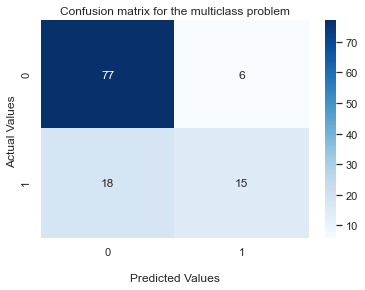

Accuracy - SMO: 79.31%



In [104]:

plot_confusion_matrix(y_val,Classifier(model0, model1,model2,X_val),"Confusion matrix for the multiclass problem","Blues")

## Genetic Algo

In [105]:
temp = df.copy()

In [106]:
df = df.iloc[:, :-3]

In [107]:
df.head()

,Age,Gender,TB,DB,Alk,sgpt,sgot,TP,ALB,AG,label
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [108]:
y_train = df['label']
x_train = df.drop(labels =['label'],axis=1)

ohe = OneHotEncoder()
le = LabelEncoder()

cols = x_train.columns.values
for col in cols:
    x_train[col] = le.fit_transform(x_train[col])

y_train = le.fit_transform(y_train)

ohe = OneHotEncoder()
x_train = ohe.fit_transform(x_train).toarray()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)


x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.30, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size = 0.50, random_state = 42)

In [109]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

def relu(x):
    return np.maximum(0, x)

def forward(x, w, activation):
    return activation(np.matmul(x, w))

def accuracy_fn(y, y_hat):
    return (np.where(y == y_hat)[0].size / y_hat.size)

def predict(x, y_hat, weights, activation):
    predictions = np.zeros(shape=(x.shape[0]))
    
    for idx in range(x.shape[0]):
        r1 = x[idx, :]
        for curr_weights in weights:
            r1 = forward(r1, curr_weights, activation)
        predictions[idx] = np.where(r1 == np.max(r1))[0][0]

    accuracy = accuracy_fn(predictions, y_hat)
    return accuracy, predictions
    
def fitness(x, y_hat, weights, activation):
    accuracy = np.empty(shape=(weights.shape[0]))
    for idx in range(weights.shape[0]):
        accuracy[idx], _ = predict(x, y_hat, weights[idx, :], activation)
    return accuracy

In [110]:
def mat_to_vector(mat_pop_weights):
    weights_vector = []
    for idx in range(mat_pop_weights.shape[0]):
        curr_vector = []
        for layer_idx in range(mat_pop_weights.shape[1]):
            vector_weights = np.reshape(mat_pop_weights[idx, layer_idx], newshape=(mat_pop_weights[idx, layer_idx].size))
            curr_vector.extend(vector_weights)
        weights_vector.append(curr_vector)
    return np.array(weights_vector)


def vector_to_mat(vector_weights, mat_pop_weights):
    mat_weights = []
    for idx in range(mat_pop_weights.shape[0]):
        start = 0
        end = 0
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = end + mat_pop_weights[idx, layer_idx].size
            curr_vector = vector_weights[idx, start:end]
            mat_layer_weights = np.reshape(curr_vector, newshape=(mat_pop_weights[idx, layer_idx].shape))
            mat_weights.append(mat_layer_weights)
            start = end
    return np.reshape(mat_weights, newshape=mat_pop_weights.shape)

In [111]:
def mating_pool(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint32(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        
    return offspring


def mutation(offspring_crossover, mutation_percent):
    num_mutations = np.uint32((mutation_percent*offspring_crossover.shape[1]))
    mutation_indices = np.array(random.sample(range(0, offspring_crossover.shape[1]), num_mutations))
    
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indices] = offspring_crossover[idx, mutation_indices] + random_value
    
    return offspring_crossover

In [112]:
solution_per_population = 8
num_parents_mating = 4
num_generations = 100
mutation_percent = 0.20
input_shape = x_train.shape[1]
output_shape = len(np.unique(y_train))

In [113]:
initial_weights = []
for curr_sol in np.arange(0, solution_per_population):
    
    w1 = np.random.uniform(low=-0.1, high=0.1, size=(input_shape, 128))
    w2 = np.random.uniform(low=-0.1, high=0.1, size=(128, 64))
    w3 = np.random.uniform(low=-0.1, high=0.1,size=(64, output_shape))

    initial_weights.append(np.array([w1, w2, w3]))
weights_mat = np.array(initial_weights)
weights_vector = mat_to_vector(weights_mat)

best_outputs = []
accuracies = np.empty(shape=(num_generations))

In [114]:
import random

In [115]:
from tqdm.auto import tqdm

In [116]:
for generation in tqdm(range(num_generations)):
    
    weights_mat = vector_to_mat(weights_vector, weights_mat)

    fit = fitness(x_train, y_train, weights_mat, activation=sigmoid)
    
    accuracies[generation] = fit[0]

    parents = mating_pool(weights_vector, fit.copy(), num_parents_mating)

    offspring_crossover = crossover(parents, offspring_size=(weights_vector.shape[0]-parents.shape[0], weights_vector.shape[1]))

    offspring_mutation = mutation(offspring_crossover, mutation_percent=mutation_percent)
    
    weights_vector[0:parents.shape[0], :] = parents
    weights_vector[parents.shape[0]:, :] = offspring_mutation

  0%|          | 0/100 [00:00<?, ?it/s]

In [117]:
weights_mat = vector_to_mat(weights_vector, weights_mat)
best_weights = weights_mat [0, :]
acc, predictions = predict(x_test, y_test, best_weights, sigmoid)
print("Accuracy - Genetic Algorithm : ", acc)

Accuracy - Genetic Algorithm :  0.7931034482758621


# Accuracies
### SVM - 71.2%
### SVM with CSA - 89.8%
### SMO - 79.3%
### Genetic Algorithm - 79.31%
### Multi-verse -  74.13%
### Particle Swarm -  69.16%
### Firefly -  83.86%


In [119]:
models = ['SVM', 'SVM with CSA', 'SMO', 'Genetic', 'Multi-verse', 'Particle Swarm', 'Firefly']
accuracies = [71.2, 89.8, 79.3, 79.31, 74.13, 69.16, 83.86]

In [120]:
import seaborn as sns

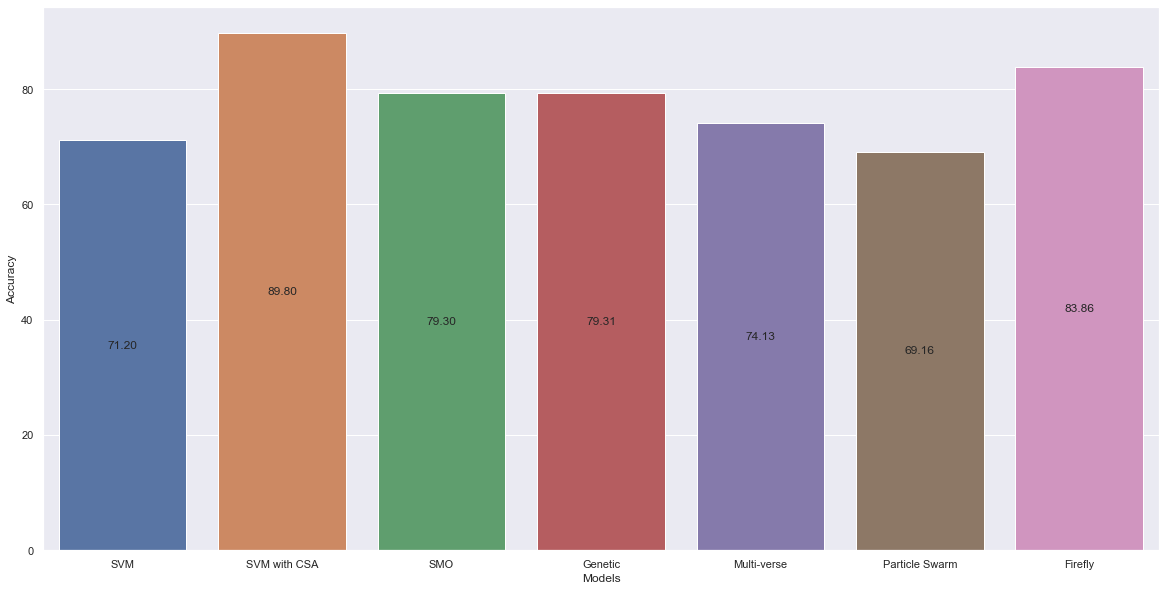

In [121]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(models, accuracies, capsize=0.2, ax=ax)


for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

ax.set(xlabel='Models', ylabel='Accuracy')
plt.show()